In [31]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import silhouette_score
from math import pi

## Label

In [58]:
#Dataset Label Encoder
df_label = pd.read_csv('DataCleanLabel.csv')
df_label.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [60]:
#Data Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_label)

K=1, Inertia=2735.901340178044
K=2, Inertia=2162.397226519164
K=3, Inertia=1887.7485576447637
K=4, Inertia=1764.253171039236
K=5, Inertia=1666.3288085306708
K=6, Inertia=1575.8068300921443
K=7, Inertia=1509.1811728397456
K=8, Inertia=1409.64813507196
K=9, Inertia=1355.9152646771515


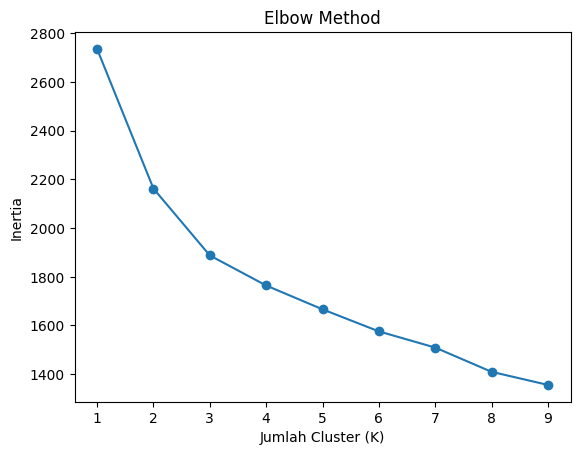

In [61]:
#Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    print(f'K={k}, Inertia={kmeans.inertia_}')
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [62]:
K = 3# Tentukan jumlah cluster berdasarkan Elbow Method
kmeans = KMeans(n_clusters=K)
kmeans.fit(df_scaled)
labels = kmeans.labels_
df_label["Cluster"] = labels
# df_label['NObeyesdad'] = obese_level
df_label.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Cluster
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1,2
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1,2
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6,0


In [64]:
#shilhouette score
score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.18850021164986938


## OneHot Only

In [37]:
# DataSet
df_onehot = pd.read_csv('DataCleanOneHot.csv')
df_onehot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2064 non-null   float64
 1   Height                              2064 non-null   float64
 2   Weight                              2064 non-null   float64
 3   FCVC                                2064 non-null   float64
 4   NCP                                 2064 non-null   float64
 5   CH2O                                2064 non-null   float64
 6   FAF                                 2064 non-null   float64
 7   TUE                                 2064 non-null   float64
 8   Gender_Male                         2064 non-null   int64  
 9   SMOKE_yes                           2064 non-null   int64  
 10  FAVC_yes                            2064 non-null   int64  
 11  SCC_yes                             2064 no

In [54]:
#Data Standardization
scaler = StandardScaler()
df_scaled_onehot = scaler.fit_transform(df_onehot)

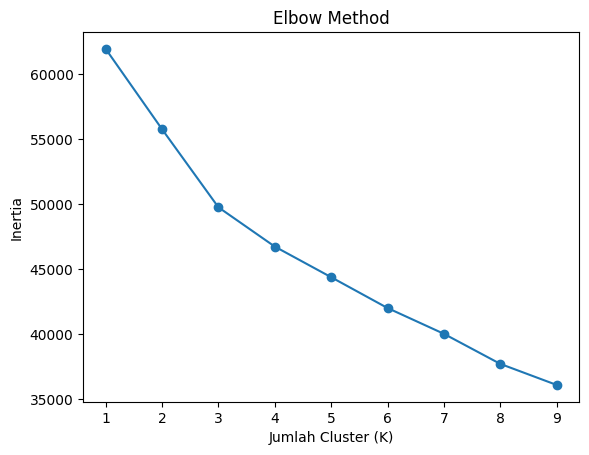

In [65]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_onehot)
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [74]:
K = 3
kmeans = KMeans(n_clusters=K)
kmeans.fit(df_scaled_onehot)
df_onehot['Cluster'] = kmeans.labels_
df_onehot.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,SMOKE_yes,...,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight_yes,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,Cluster
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,0,...,1,0,1,1,0,0,0,0,0,1
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,1,...,1,0,1,1,0,0,0,0,0,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,0,...,1,0,1,1,0,0,0,0,0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1,0,...,0,1,0,0,0,0,0,1,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1,0,...,1,0,0,0,0,0,0,0,1,2


In [75]:
#shilhouette score
score_one = silhouette_score(df_scaled_onehot, kmeans.labels_)
print(f'Silhouette Score: {score_one}')


Silhouette Score: 0.14496044908375041
